In [35]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

from datasets import load_dataset

In [36]:
def visualize_spectrogram(arr, sr=12000, label="Unknown"):
    """
    Visualizes the spectrogram

    Parameters
    ----------
    arr : np.ndarray
        Audio signal.
    sr : int
        Sample rate.
    label : str
        Title label for the plot.
    """
    hop_length = 512
    n_fft = 1024

    # Compute STFT and convert to dB
    stft_data = librosa.stft(arr, n_fft=n_fft, hop_length=hop_length)
    S_db = librosa.amplitude_to_db(np.abs(stft_data), ref=np.max)

    plt.figure(figsize=(10, 6))
    librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='magma')
    plt.colorbar(label="dB")
    plt.title(f"Spectrogram - {label}")
    plt.legend()
    plt.show()

In [37]:
def visualize_waveform(arr, sr=12000, label="Unknown"):
    """
    Visualizes the waveform

    Parameters
    ----------
    arr : np.ndarray
        Audio signal.
    sr : int
        Sample rate.
    label : str
        Title label for the plot.
    """
    
    times = librosa.times_like(arr, sr=sr)
    plt.figure(figsize=(12, 4))
    plt.plot(times, arr, alpha=0.7, color='b')
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title(f"Waveform of the Audio Signal - {label}")
    plt.legend()
    plt.show()

In [38]:
def visualize_waveform_fourrier(arr, sr=12000, label="Unknown"):
    """
    Visualizes the waveform after Fourrier transformation

    Parameters
    ----------
    arr : np.ndarray
        Audio signal.
    sr : int
        Sample rate.
    label : str
        Title label for the plot.
    """

    fft_result = np.fft.fft(arr)
    frequencies = np.fft.fftfreq(len(arr), 1/sr)

    plt.figure(figsize=(12, 6))
    plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(fft_result)//2])
    plt.title(f"Frequency Spectrum (Fourrier) - {label}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.show()

In [39]:
def visualize_mean_spectral_energy(arr, sr=12000, label="Unknown"):
    """
    Visualizes the mean spectral energy

    Parameters
    ----------
    arr : np.ndarray
        Audio signal.
    sr : int
        Sample rate.
    label : str
        Title label for the plot.
    """
    n_fft = 2048
    hop_length = 512
    stft = librosa.stft(arr, n_fft=n_fft, hop_length=hop_length)

    magnitude = np.abs(stft)

    frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    mask = frequencies <= 1000
    filtered_magnitude = magnitude[mask]
    filtered_frequencies = frequencies[mask]

    mean_energy = np.mean(filtered_magnitude, axis=1)
    plt.figure(figsize=(10, 4))
    plt.plot(filtered_frequencies, mean_energy)
    plt.title(f'Mean Spectral Energy Below 1000Hz - {label}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Mean Energy')
    plt.ylim(0, 10)  # Set y-axis from 0 to 110% of max energy
    plt.tight_layout()
    plt.show()

In [40]:
train_ds, test_ds = load_dataset("rfcx/frugalai",split=['train', 'test'])

/tmp/ipykernel_361630/601870052.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


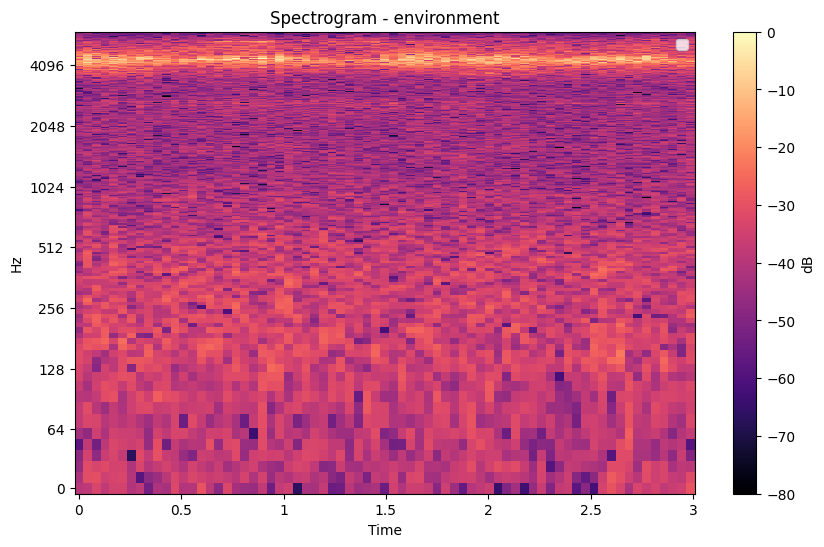

/tmp/ipykernel_361630/2348780406.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


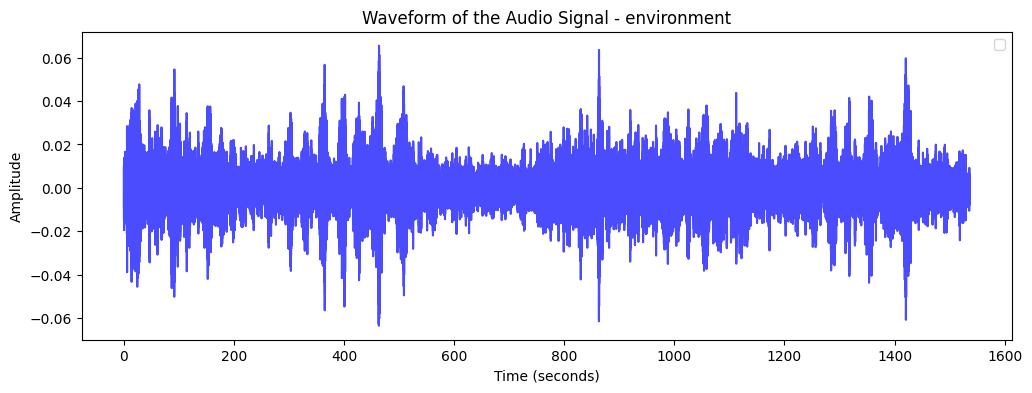

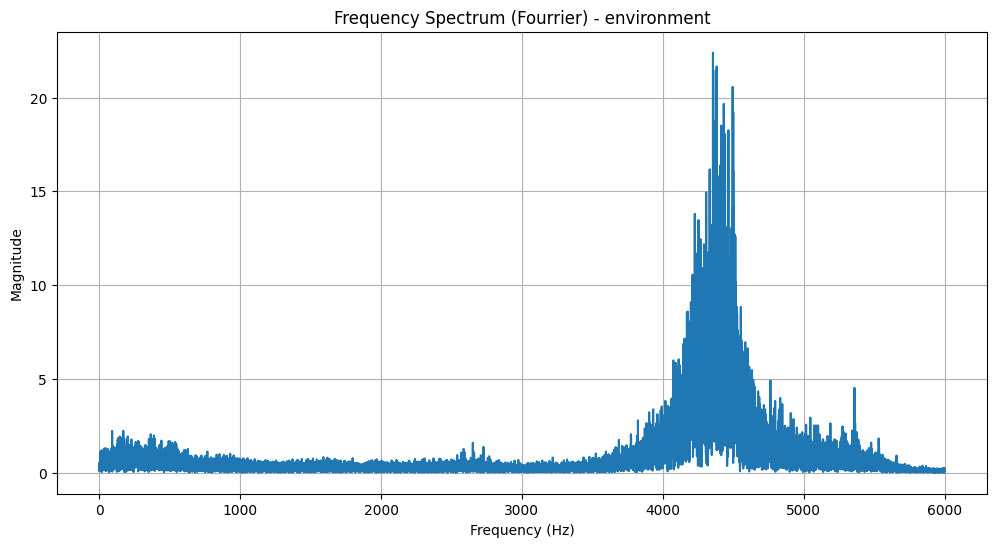

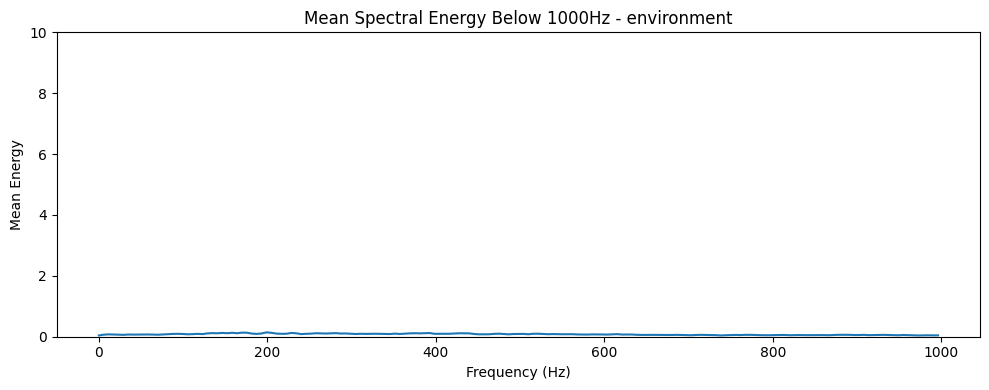

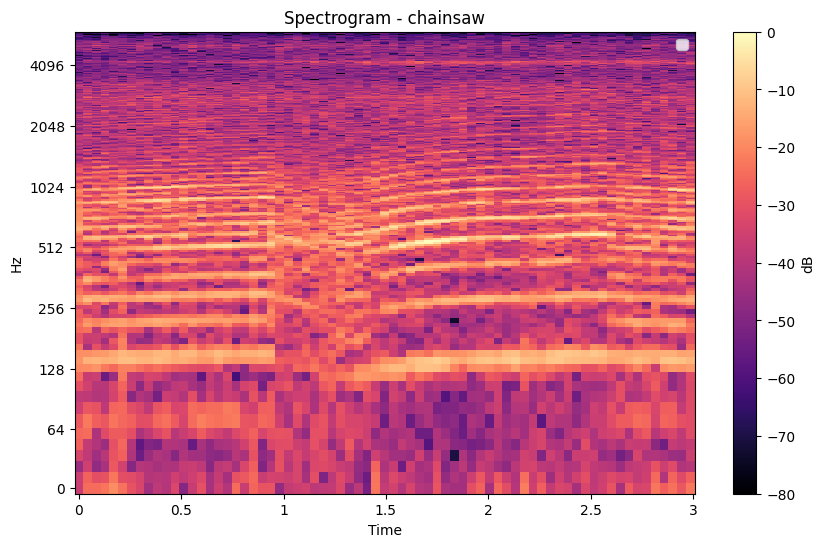

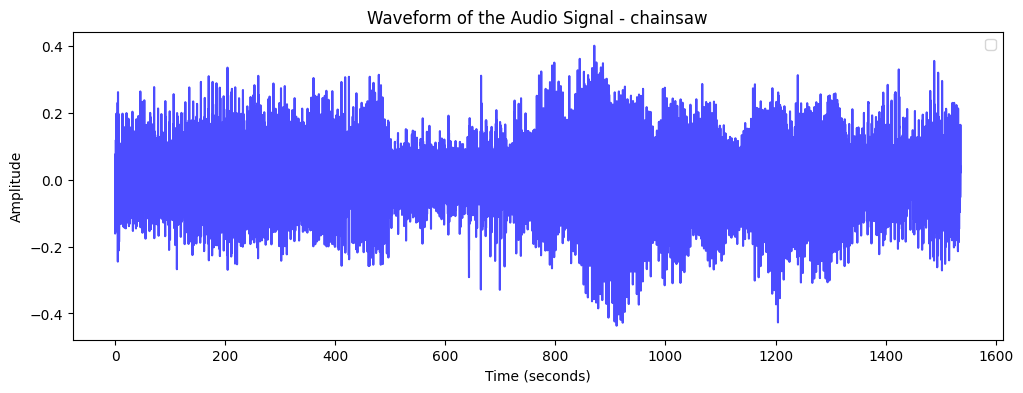

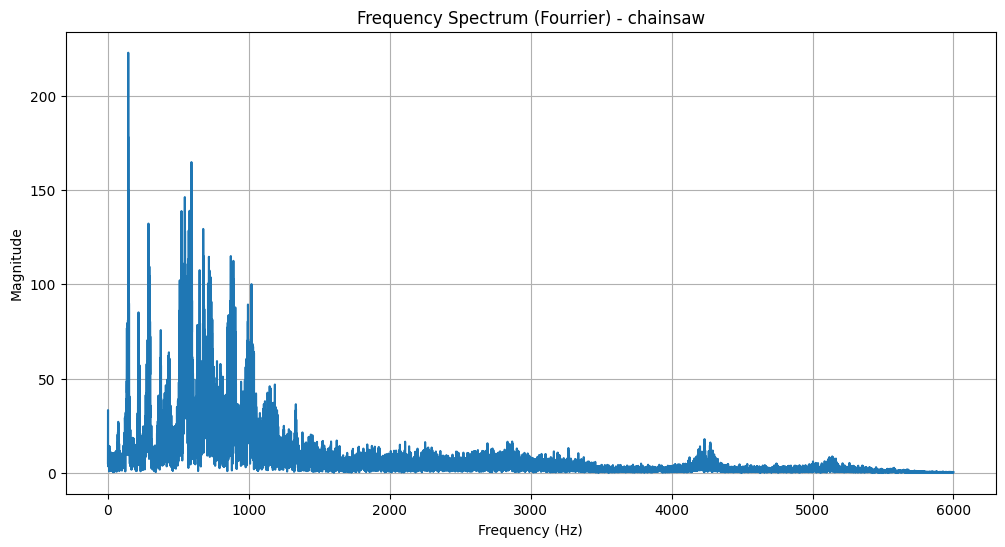

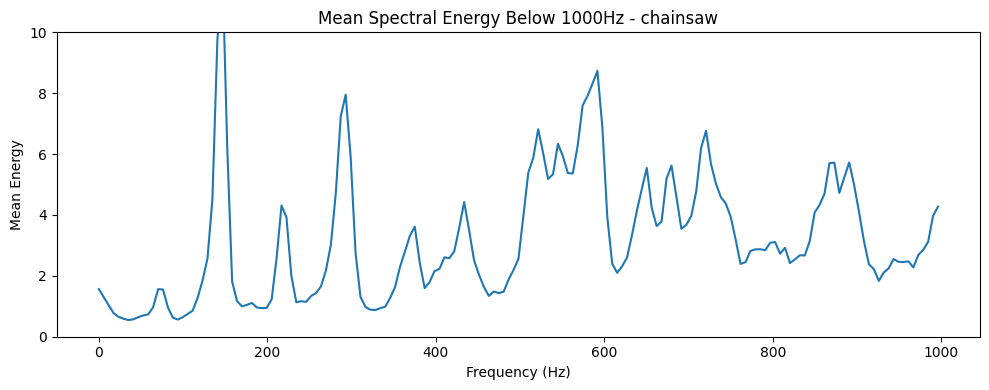

In [41]:
for sample in train_ds.select(range(2)):
    audio = sample['audio']
    y = audio['array']
    sr = audio['sampling_rate']
    label = "environment" if sample['label'] == 1 else "chainsaw"
    visualize_spectrogram(y, label=label)
    visualize_waveform(y, label=label)
    visualize_waveform_fourrier(y, label=label)
    visualize_mean_spectral_energy(y, label=label)